## Средняя абсолютная ошибка в процентах (mean_absolute_percentage_error)

Метрика средней абсолютной ошибки в процентах (MAPE) в рамках машинного обучения представляет собой отношение средней абсолютной ошибки к среднему значению целевой переменной, выраженное в процентах.

Этот показатель может принимать значения от 0% до бесконечности. Чем меньше значение MAPE, тем лучше модель. Если значение MAPE равно 0%, это означает, что модель идеально предсказывает значения целевой переменной. Если значение MAPE близко к 100%, это означает, что модель совершает ошибки, равные среднему значению целевой переменной.

MAPE лучше всего применять в качестве метрики для моделей, которые работают с процентными значениями или относительными изменениями, например, для прогнозирования продаж или изменений цен на товары.

In [9]:
import math

def get_mean_absolute_percentage_error(y_true, y_pred) -> float:
    n = len(y_true)
    error = 0
    for i in range(n):
        error += abs(y_true[i] - y_pred[i]) / max(y_true[i], 1e-12) # чтобы избежать деления на 0
    error /= n
    return error

### Сравним реализацию со встроенной функцией в scikit learn

In [10]:
from sklearn.metrics import mean_absolute_percentage_error

# истинные значения
y_true = [3, 0.5, 2, 7]
# предсказанные значения
y_pred = [2.5, 0.0, 2, 8]

# расчет среднеквадратичной логарифмической ошибки
error = mean_absolute_percentage_error(y_true, y_pred)
my_error = get_mean_absolute_percentage_error(y_true, y_pred)

print("Полученная cредняя абсолютная ошибка в процентах на тесте 1:", error)
print("Рассчитанная cредняя абсолютная ошибка в процентах на тесте 1:", my_error)

Полученная cредняя абсолютная ошибка в процентах на тесте 1: 0.3273809523809524
Рассчитанная cредняя абсолютная ошибка в процентах на тесте 1: 0.3273809523809524


In [11]:
from sklearn.metrics import mean_absolute_percentage_error

# истинные значения
y_true = [2, 2, 2]
# предсказанные значения
y_pred = [2, 2, 2]

# расчет среднеквадратичной логарифмической ошибки
error = mean_absolute_percentage_error(y_true, y_pred)
my_error = get_mean_absolute_percentage_error(y_true, y_pred)

print("Полученная cредняя абсолютная ошибка в процентах на тесте 2:", error)
print("Рассчитанная cредняя абсолютная ошибка в процентах на тесте 2:", my_error)

Полученная cредняя абсолютная ошибка в процентах на тесте 2: 0.0
Рассчитанная cредняя абсолютная ошибка в процентах на тесте 2: 0.0


In [12]:
from sklearn.metrics import mean_absolute_percentage_error

# истинные значения
y_true = [2, 2, 2]
# предсказанные значения
y_pred = [2, 2, 2 + 1e-8]

# расчет среднеквадратичной логарифмической ошибки
error = mean_absolute_percentage_error(y_true, y_pred)
my_error = get_mean_absolute_percentage_error(y_true, y_pred)

print("Полученная cредняя абсолютная ошибка в процентах на тесте 3:", error)
print("Рассчитанная cредняя абсолютная ошибка в процентах на тесте 3:", my_error)

Полученная cредняя абсолютная ошибка в процентах на тесте 3: 1.6666666565375483e-09
Рассчитанная cредняя абсолютная ошибка в процентах на тесте 3: 1.6666666565375483e-09


In [16]:
from sklearn.metrics import mean_absolute_percentage_error

# истинные значения
y_true = [1, 2, 3, 4, 5]
# предсказанные значения
y_pred = [3, 3, 3, 3, 3]

# расчет среднеквадратичной логарифмической ошибки
error = mean_absolute_percentage_error(y_true, y_pred)
my_error = get_mean_absolute_percentage_error(y_true, y_pred)

print("Полученная cредняя абсолютная ошибка в процентах на тесте 4:", error)
print("Рассчитанная cредняя абсолютная ошибка в процентах на тесте 4:", my_error)

Полученная cредняя абсолютная ошибка в процентах на тесте 4: 0.63
Рассчитанная cредняя абсолютная ошибка в процентах на тесте 4: 0.63


In [21]:
from sklearn.metrics import mean_absolute_percentage_error

# истинные значения
y_true = [1, 2, 3, 4, 5]
# предсказанные значения
y_pred = [2, 2, 2, 2, 4]

# расчет среднеквадратичной логарифмической ошибки
error = mean_absolute_percentage_error(y_true, y_pred)
my_error = get_mean_absolute_percentage_error(y_true, y_pred)

print("Полученная cредняя абсолютная ошибка в процентах на тесте 5:", error)
print("Рассчитанная cредняя абсолютная ошибка в процентах на тесте 5:", my_error)

Полученная cредняя абсолютная ошибка в процентах на тесте 5: 0.4066666666666666
Рассчитанная cредняя абсолютная ошибка в процентах на тесте 5: 0.4066666666666666


### Рассмотрим поведение выборки на различных константных предсказаниях и найдем оптимальный вариант подобной константы

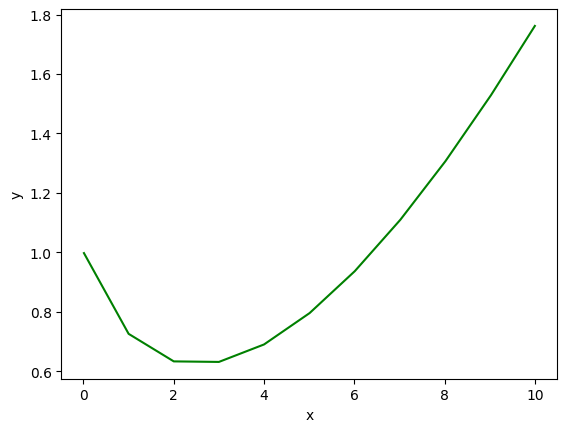

Минимальная ошибка равна 0.630943 и получена при значении 3.0
Оптимальная константа при этом равна 3


In [53]:
import matplotlib.pyplot as plt
import numpy as np

x = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
y_true = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(mean_absolute_percentage_error(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Минимальная ошибка равна {min(errors)} и получена при значении {checks[errors.index(min(errors))]}')

sort_y = sorted(y_true)
ind = 0
while sum(1 / sort_y[i] for i in range(ind)) < sum(1 / sort_y[i] for i in range(ind, len(y_true))):
  ind += 1

print(f'Оптимальная константа при этом равна {round(sort_y[ind - 1], 2)}')

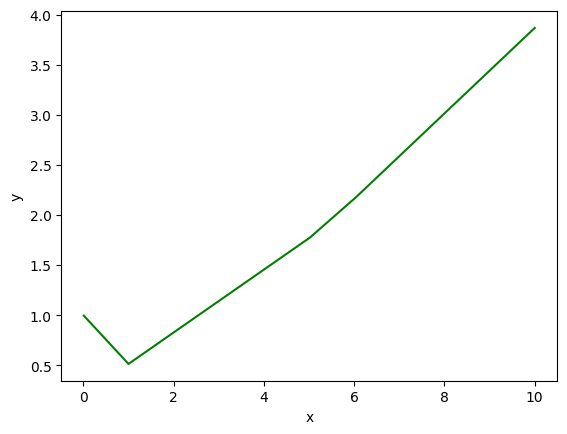

Минимальная ошибка равна 0.513333 и получена при значении 1.0
Оптимальная константа при этом равна 1


In [54]:
import matplotlib.pyplot as plt
import numpy as np

x = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
y_true = 1, 1, 1, 1, 5, 10, 10, 6, 5, 10
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(mean_absolute_percentage_error(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Минимальная ошибка равна {min(errors)} и получена при значении {checks[errors.index(min(errors))]}')

sort_y = sorted(y_true)
ind = 0
while sum(1 / sort_y[i] for i in range(ind)) < sum(1 / sort_y[i] for i in range(ind, len(y_true))):
  ind += 1

print(f'Оптимальная константа при этом равна {round(sort_y[ind - 1], 2)}')

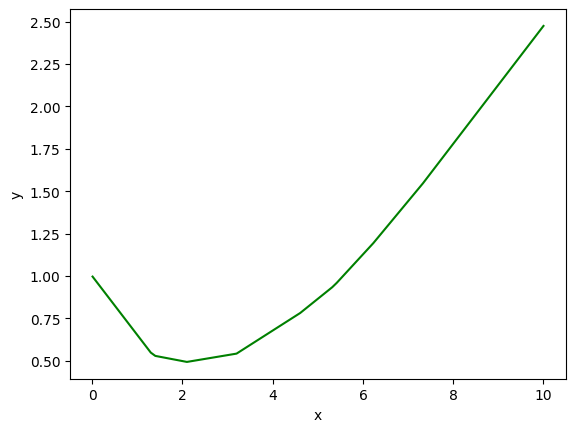

Минимальная ошибка равна 0.493487 и получена при значении 2.1
Оптимальная константа при этом равна 2.1


In [55]:
import matplotlib.pyplot as plt
import numpy as np

x = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
y_true = 7.3, 4.6, 2.1, 5.3, 6.2, 1.3, 5.4, 3.2, 1.4, 3.2
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(mean_absolute_percentage_error(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Минимальная ошибка равна {min(errors)} и получена при значении {checks[errors.index(min(errors))]}')

sort_y = sorted(y_true)
ind = 0
while sum(1 / sort_y[i] for i in range(ind)) < sum(1 / sort_y[i] for i in range(ind, len(y_true))):
  ind += 1
  
print(f'Оптимальная константа при этом равна {round(sort_y[ind - 1], 2)}')

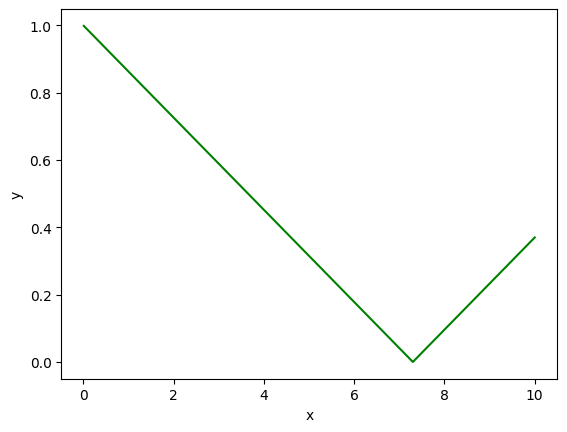

Минимальная ошибка равна 0.0 и получена при значении 7.3
Оптимальная константа при этом равна 7.3


In [57]:
import matplotlib.pyplot as plt
import numpy as np

x = 1
y_true = [7.3]
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(mean_absolute_percentage_error(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Минимальная ошибка равна {min(errors)} и получена при значении {checks[errors.index(min(errors))]}')

sort_y = sorted(y_true)
ind = 0
while sum(1 / sort_y[i] for i in range(ind)) < sum(1 / sort_y[i] for i in range(ind, len(y_true))):
  ind += 1
  
print(f'Оптимальная константа при этом равна {round(sort_y[ind - 1], 2)}')

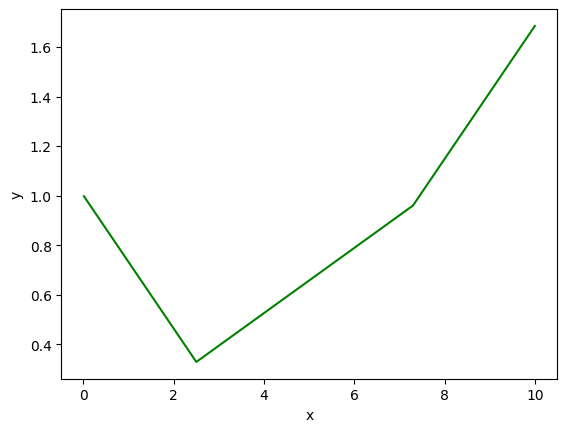

Минимальная ошибка равна 0.328767 и получена при значении 2.5
Оптимальная константа при этом равна 2.5


In [58]:
import matplotlib.pyplot as plt
import numpy as np

x = 1
y_true = [7.3, 2.5]
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(mean_absolute_percentage_error(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Минимальная ошибка равна {min(errors)} и получена при значении {checks[errors.index(min(errors))]}')

sort_y = sorted(y_true)
ind = 0
while sum(1 / sort_y[i] for i in range(ind)) < sum(1 / sort_y[i] for i in range(ind, len(y_true))):
  ind += 1
  
print(f'Оптимальная константа при этом равна {round(sort_y[ind - 1], 2)}')